In [1]:
import tensorflow as tf
import pathlib
import imageio
import IPython.display as display
tf.enable_eager_execution()
import os

path=os.getcwd()+'\\\sp-society-camera-model-identification'
os.chdir(path)



C:\Users\andyz\Anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\andyz\Anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\andyz\Anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\andyz\Anaconda3\envs\tensorflow_env\l

In [2]:
trainpath = path+"\\train"
os.chdir(trainpath)

In [3]:
cameras = os.listdir()
cameras.remove('.gitignore')
filecount = [len(os.listdir(camera))  for camera in cameras]
import pandas as pd
df = pd.DataFrame({'camera_type':cameras,'filecount':filecount})

In [4]:
df

,camera_type,filecount
0,HTC-1-M7,275
1,iPhone-4s,275
2,iPhone-6,275
3,LG-Nexus-5x,275
4,Motorola-Droid-Maxx,275
5,Motorola-Nexus-6,275
6,Motorola-X,275
7,Samsung-Galaxy-Note3,275
8,Samsung-Galaxy-S4,275
9,Sony-NEX-7,275


In [5]:
class_dict = {}
for id in df.index:
    class_dict.update({df.loc[id,'camera_type']:id})
    
class_dict

{'HTC-1-M7': 0,
 'iPhone-4s': 1,
 'iPhone-6': 2,
 'LG-Nexus-5x': 3,
 'Motorola-Droid-Maxx': 4,
 'Motorola-Nexus-6': 5,
 'Motorola-X': 6,
 'Samsung-Galaxy-Note3': 7,
 'Samsung-Galaxy-S4': 8,
 'Sony-NEX-7': 9}

In [6]:
testpath= path+'\\test'
testcount = len(os.listdir(testpath))-1 #to account for .gitignore files
print(f"Total number of test files :{testcount}")

Total number of test files :2640


In [7]:
print(f"Total training set data :{df.filecount.sum()}")

Total training set data :2750


In [8]:
training_paths = pathlib.Path(trainpath).glob('*\*.jpg')
training_paths

<generator object Path.glob at 0x00000202156357C8>

In [9]:
imglist = [str(x) for x in training_paths]
imglist[0]

'D:\\Study\\Capstone\\cameraDetection\\sp-society-camera-model-identification\\train\\HTC-1-M7\\(HTC-1-M7)1.jpg'

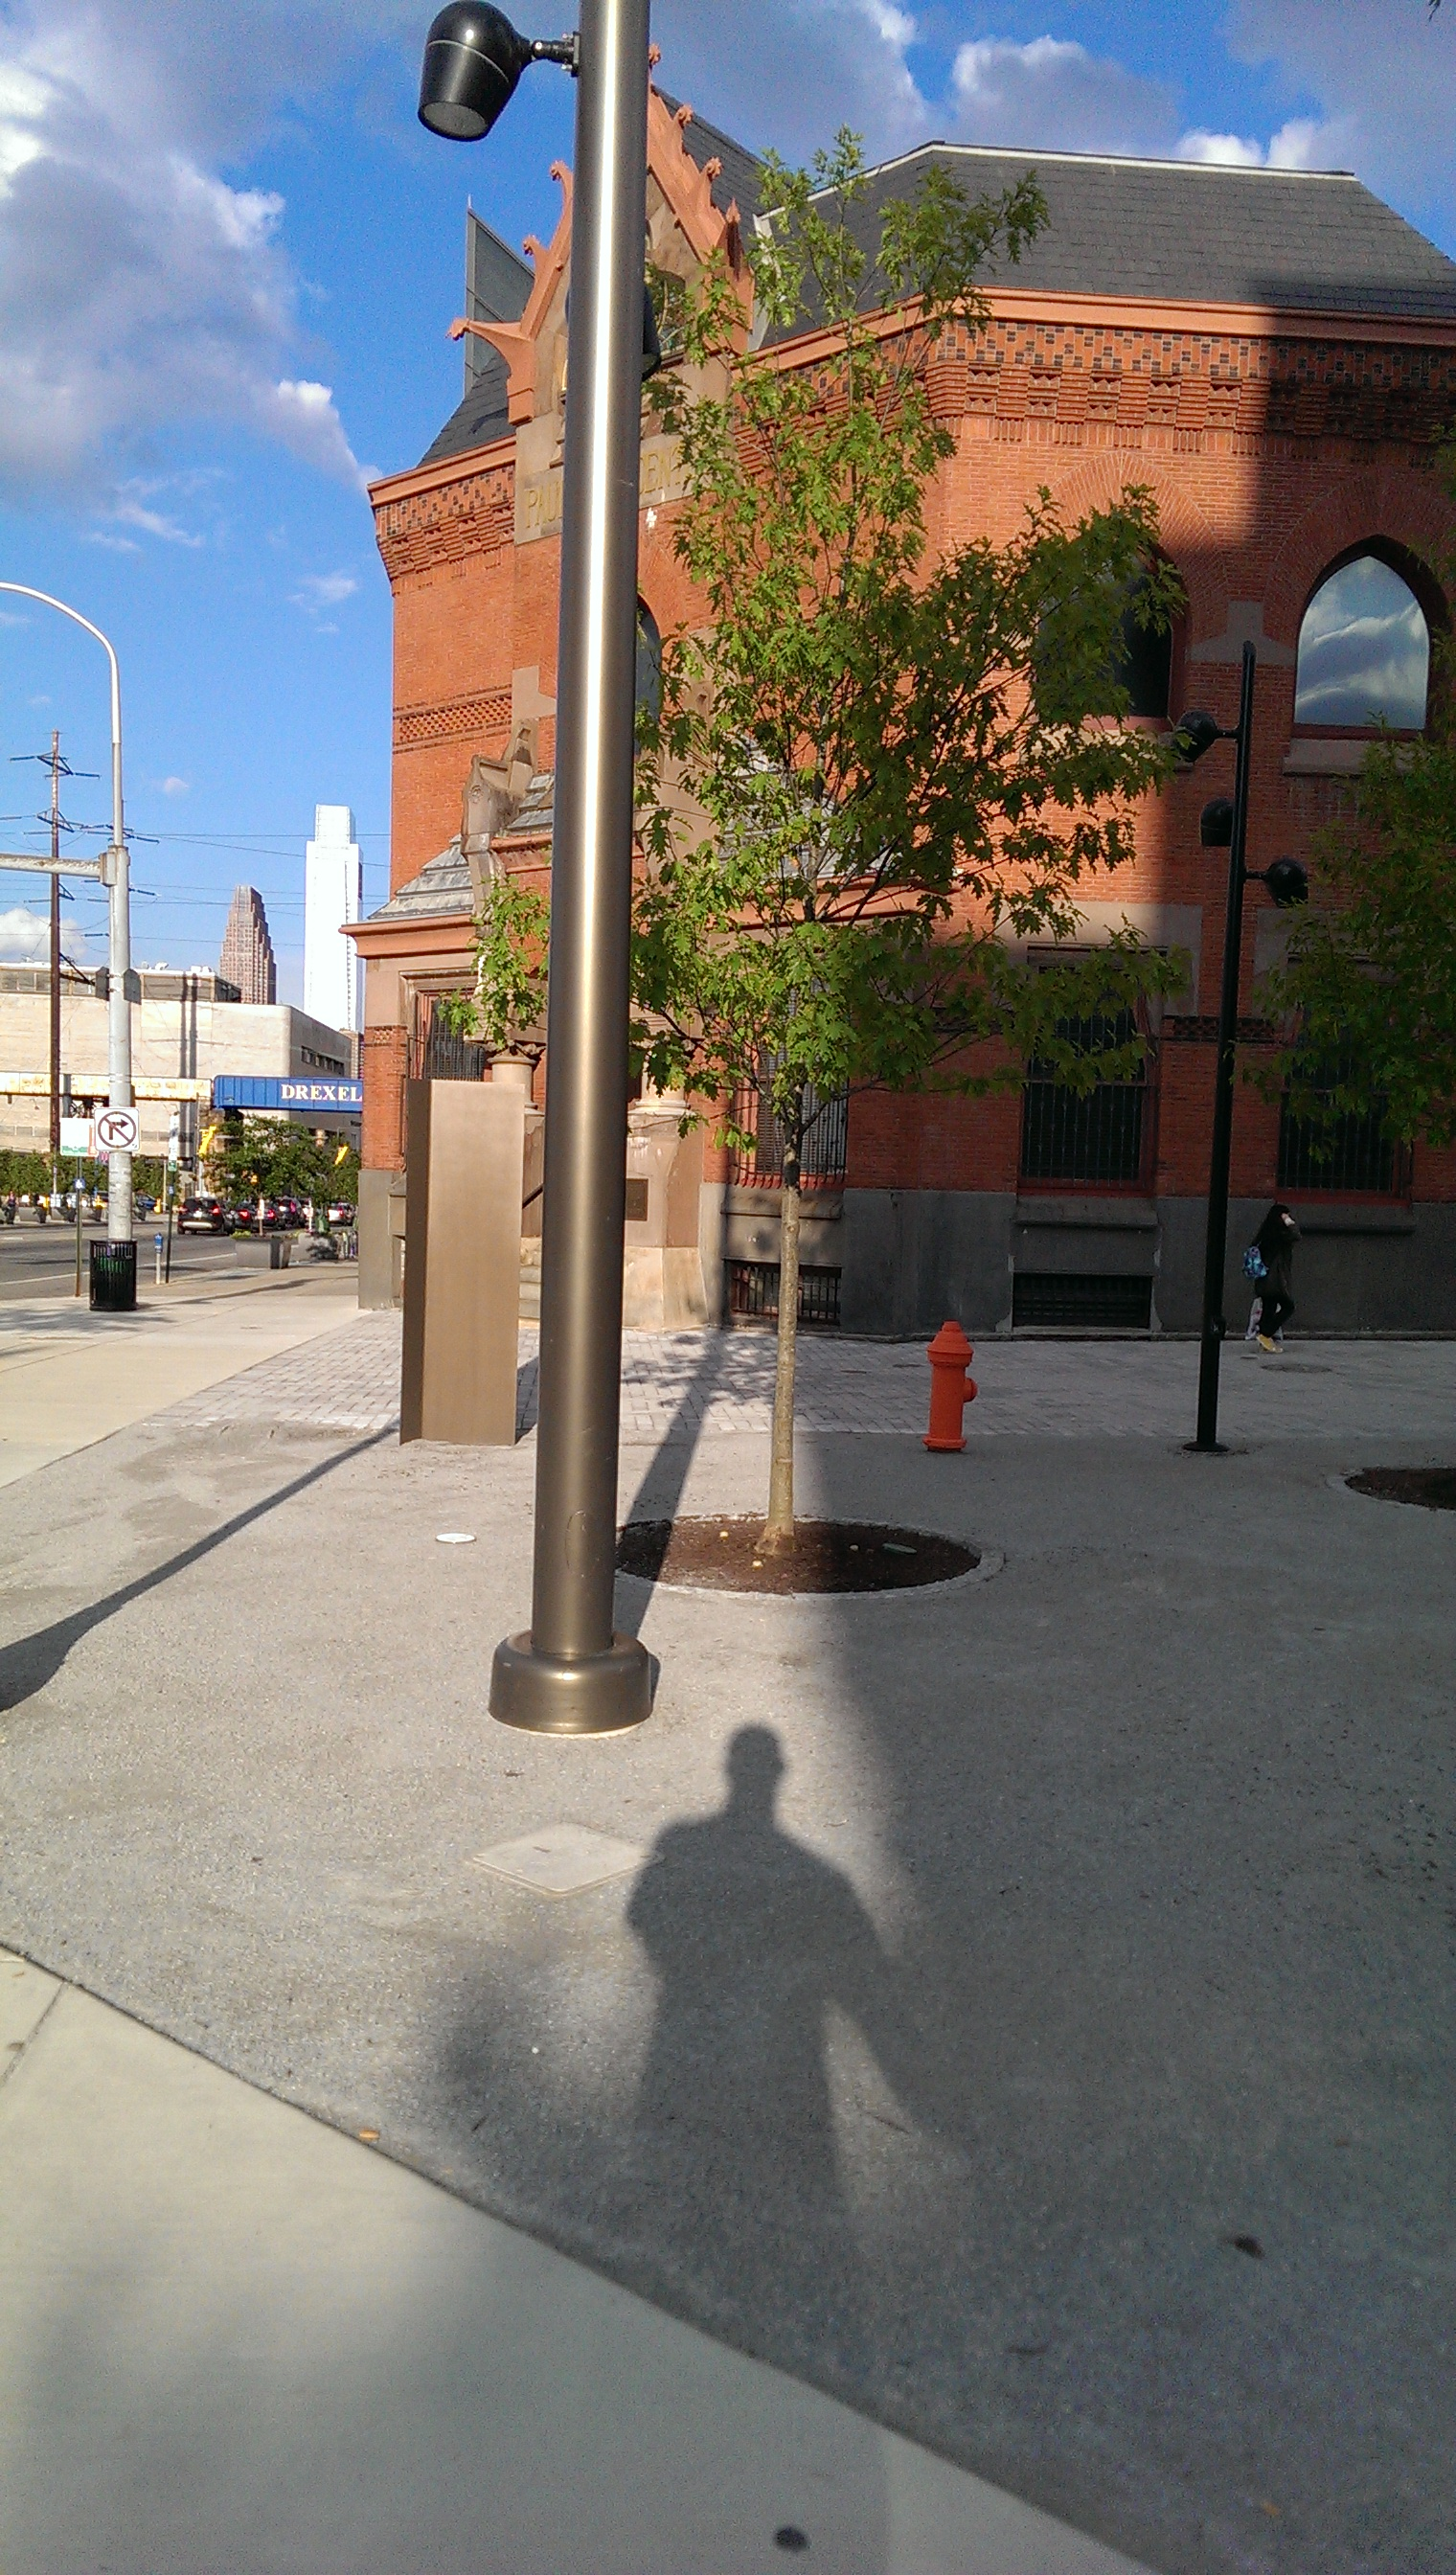

In [9]:
display.display(display.Image(imglist[0]))

In [ ]:
im = imageio.imread(str(imglist[0]))
im

In [10]:
#read images only with tf code

img_raw = tf.io.read_file(str(imglist[0]))
#img_tensor = tf.image.decode_image(img_raw)

def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [192, 192])
  image /= 255.0  # normalize to [0,1] range
  return image

def decode_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    return image

img_df = pd.DataFrame(columns=['location','original','image'])
i = 0
for imglocation in imglist:
    
    img_raw = tf.io.read_file(imglocation)
    img = preprocess_image(img_raw)
    orig = decode_image(img_raw)
    img_df.set_value(i,'original',orig)
    img_df.set_value(i,'location',imglocation)
    img_df.set_value(i,'image',img)
    i+=1
    #if (i==10):
    #    break
img_df

C:\Users\andyz\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\andyz\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\andyz\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,location,original,image
0,D:\Study\Capstone\cameraDetection\sp-society-c...,"(((tf.Tensor(120, shape=(), dtype=uint8), tf.T...","(((tf.Tensor(0.47058824, shape=(), dtype=float..."
1,D:\Study\Capstone\cameraDetection\sp-society-c...,"(((tf.Tensor(172, shape=(), dtype=uint8), tf.T...","(((tf.Tensor(0.6745098, shape=(), dtype=float3..."
2,D:\Study\Capstone\cameraDetection\sp-society-c...,"(((tf.Tensor(152, shape=(), dtype=uint8), tf.T...","(((tf.Tensor(0.59607846, shape=(), dtype=float..."
3,D:\Study\Capstone\cameraDetection\sp-society-c...,"(((tf.Tensor(106, shape=(), dtype=uint8), tf.T...","(((tf.Tensor(0.41568628, shape=(), dtype=float..."
4,D:\Study\Capstone\cameraDetection\sp-society-c...,"(((tf.Tensor(147, shape=(), dtype=uint8), tf.T...","(((tf.Tensor(0.5764706, shape=(), dtype=float3..."
5,D:\Study\Capstone\cameraDetection\sp-society-c...,"(((tf.Tensor(74, shape=(), dtype=uint8), tf.Te...","(((tf.Tensor(0.2901961, shape=(), dtype=float3..."
6,D:\Study\Capstone\cameraDetection\sp-society-c...,"(((tf.Tensor(169, shape=(), dtype=uint8), tf.T...","(((tf.Tensor(0.6627451, shape=(), dtype=float3..."
7,D:\Study\Capstone\cameraDetection\sp-society-c...,"(((tf.Tensor(167, shape=(), dtype=uint8), tf.T...","(((tf.Tensor(0.654902, shape=(), dtype=float32..."
8,D:\Study\Capstone\cameraDetection\sp-society-c...,"(((tf.Tensor(58, shape=(), dtype=uint8), tf.Te...","(((tf.Tensor(0.22745098, shape=(), dtype=float..."
9,D:\Study\Capstone\cameraDetection\sp-society-c...,"(((tf.Tensor(179, shape=(), dtype=uint8), tf.T...","(((tf.Tensor(0.7019608, shape=(), dtype=float3..."


In [11]:
img_df['location'].str.split('\\')[0]
img_df['camera'] = img_df['location'].apply(lambda x: x.split('\\')[-2])
img_df

,location,original,image,camera
0,D:\Study\Capstone\cameraDetection\sp-society-c...,"(((tf.Tensor(120, shape=(), dtype=uint8), tf.T...","(((tf.Tensor(0.47058824, shape=(), dtype=float...",HTC-1-M7
1,D:\Study\Capstone\cameraDetection\sp-society-c...,"(((tf.Tensor(172, shape=(), dtype=uint8), tf.T...","(((tf.Tensor(0.6745098, shape=(), dtype=float3...",HTC-1-M7
2,D:\Study\Capstone\cameraDetection\sp-society-c...,"(((tf.Tensor(152, shape=(), dtype=uint8), tf.T...","(((tf.Tensor(0.59607846, shape=(), dtype=float...",HTC-1-M7
3,D:\Study\Capstone\cameraDetection\sp-society-c...,"(((tf.Tensor(106, shape=(), dtype=uint8), tf.T...","(((tf.Tensor(0.41568628, shape=(), dtype=float...",HTC-1-M7
4,D:\Study\Capstone\cameraDetection\sp-society-c...,"(((tf.Tensor(147, shape=(), dtype=uint8), tf.T...","(((tf.Tensor(0.5764706, shape=(), dtype=float3...",HTC-1-M7
5,D:\Study\Capstone\cameraDetection\sp-society-c...,"(((tf.Tensor(74, shape=(), dtype=uint8), tf.Te...","(((tf.Tensor(0.2901961, shape=(), dtype=float3...",HTC-1-M7
6,D:\Study\Capstone\cameraDetection\sp-society-c...,"(((tf.Tensor(169, shape=(), dtype=uint8), tf.T...","(((tf.Tensor(0.6627451, shape=(), dtype=float3...",HTC-1-M7
7,D:\Study\Capstone\cameraDetection\sp-society-c...,"(((tf.Tensor(167, shape=(), dtype=uint8), tf.T...","(((tf.Tensor(0.654902, shape=(), dtype=float32...",HTC-1-M7
8,D:\Study\Capstone\cameraDetection\sp-society-c...,"(((tf.Tensor(58, shape=(), dtype=uint8), tf.Te...","(((tf.Tensor(0.22745098, shape=(), dtype=float...",HTC-1-M7
9,D:\Study\Capstone\cameraDetection\sp-society-c...,"(((tf.Tensor(179, shape=(), dtype=uint8), tf.T...","(((tf.Tensor(0.7019608, shape=(), dtype=float3...",HTC-1-M7


In [12]:
img_df['class'] = img_df['camera'].apply(lambda x:class_dict[x])
img_df.head()

,location,original,image,camera,class
0,D:\Study\Capstone\cameraDetection\sp-society-c...,"(((tf.Tensor(120, shape=(), dtype=uint8), tf.T...","(((tf.Tensor(0.47058824, shape=(), dtype=float...",HTC-1-M7,0
1,D:\Study\Capstone\cameraDetection\sp-society-c...,"(((tf.Tensor(172, shape=(), dtype=uint8), tf.T...","(((tf.Tensor(0.6745098, shape=(), dtype=float3...",HTC-1-M7,0
2,D:\Study\Capstone\cameraDetection\sp-society-c...,"(((tf.Tensor(152, shape=(), dtype=uint8), tf.T...","(((tf.Tensor(0.59607846, shape=(), dtype=float...",HTC-1-M7,0
3,D:\Study\Capstone\cameraDetection\sp-society-c...,"(((tf.Tensor(106, shape=(), dtype=uint8), tf.T...","(((tf.Tensor(0.41568628, shape=(), dtype=float...",HTC-1-M7,0
4,D:\Study\Capstone\cameraDetection\sp-society-c...,"(((tf.Tensor(147, shape=(), dtype=uint8), tf.T...","(((tf.Tensor(0.5764706, shape=(), dtype=float3...",HTC-1-M7,0


In [ ]:
testpath = path+"\\test"
os.chdir(testpath)


test_img_df 


In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.grid(False)
#plt.xlabel(caption_image(img_path).encode('utf-8'))
plt.title('image')
